<a href="https://colab.research.google.com/github/latifahaljurayyan/insightApp/blob/main/Copy_of_Copy_of_gp_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google_play_scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00


In [2]:
from google_play_scraper import reviews, Sort
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
apps = {
    "Amazon": "com.amazon.mShop.android.shopping",
    "Shein": "com.zzkko",
    "AliExpress": "com.alibaba.aliexpresshd",
    "Noon": "com.noon.buyerapp",
    "Trendyol": "trendyol.com"
}


In [4]:
def label_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

In [5]:
all_reviews = []

for app_name, app_id in apps.items():
    print(f"Fetching reviews for {app_name}...")

    result, _ = reviews(
        app_id,
        lang="en",
        country="us",
        sort=Sort.NEWEST,
        count=3000
    )

    for r in result:
        all_reviews.append({
            "app_name": app_name,
            "review_text": r["content"],
            "rating": r["score"],
            "sentiment_label": label_sentiment(r["score"])
        })

Fetching reviews for Amazon...
Fetching reviews for Shein...
Fetching reviews for AliExpress...
Fetching reviews for Noon...
Fetching reviews for Trendyol...


In [6]:
df = pd.DataFrame(all_reviews)
df.head()


,app_name,review_text,rating,sentiment_label
0,Amazon,my friend bought a 50 ml face cream and was se...,1,Negative
1,Amazon,Tried to download Amazon app to my new tablet ...,2,Negative
2,Amazon,"very bad, I use one time only and suddenly I'm...",1,Negative
3,Amazon,Freedom,5,Positive
4,Amazon,good very nice 👌,5,Positive


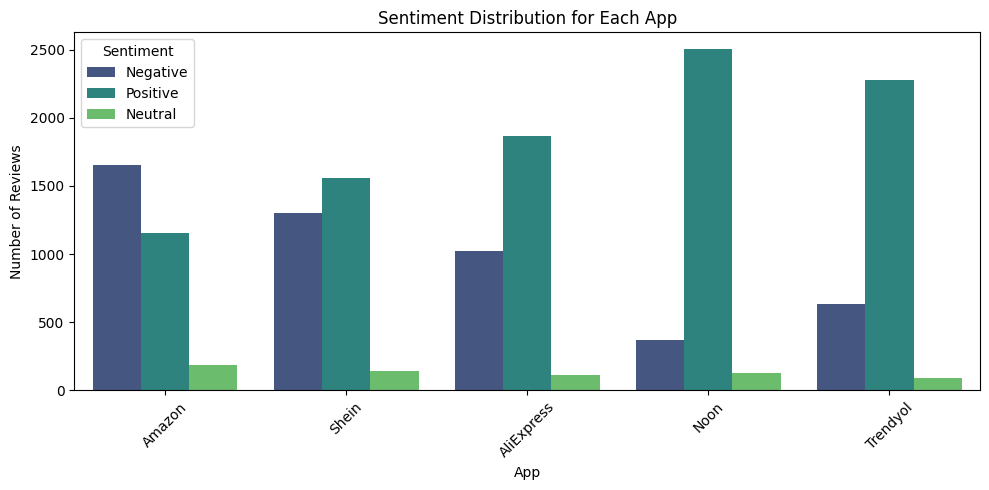

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df_before = df.copy()
plt.figure(figsize=(10,5))

sns.countplot(
    x="app_name",
    hue="sentiment_label",
    data=df_before,
    palette="viridis"
)

plt.title("Sentiment Distribution for Each App")
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [8]:
print ("Before: \n", df_before["sentiment_label"]. value_counts ())

Before: 
 sentiment_label
Positive    9351
Negative    4980
Neutral      669
Name: count, dtype: int64


In [9]:
df = df[df["review_text"].astype(str).str.contains(r"[A-Za-z]", na=False)].copy()
df["review_text"] = df["review_text"].astype(str)
df = df[df["review_text"].str.strip().ne("")].copy()

print("After language/empty filtering:", len(df))

After language/empty filtering: 14441


In [10]:
import re



def clean_text(text):

    text = re.sub(r"http\S+", "", str(text))

    text = re.sub(r"[^a-zA-Z\s]", "", text)

    text = text.lower()

    return text



df["clean_review"] = df["review_text"].apply(clean_text)

In [11]:
df.to_csv("google_play_app_reviews.csv", index=False)

In [12]:
df[["review_text", "clean_review"]].head(10)

,review_text,clean_review
0,my friend bought a 50 ml face cream and was se...,my friend bought a ml face cream and was sent...
1,Tried to download Amazon app to my new tablet ...,tried to download amazon app to my new tablet ...
2,"very bad, I use one time only and suddenly I'm...",very bad i use one time only and suddenly im p...
3,Freedom,freedom
4,good very nice 👌,good very nice
5,App won't open,app wont open
6,First and last purchase honestly. I haven't ev...,first and last purchase honestly i havent even...
7,the experience of shopping between different c...,the experience of shopping between different c...
8,No longer available for tablets? What's your e...,no longer available for tablets whats your exc...
9,It's fun to use,its fun to use


In [13]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [14]:
df["Tokens"]= df["clean_review"].apply(word_tokenize)
df[[ "clean_review","Tokens"]].head(5)

,clean_review,Tokens
0,my friend bought a ml face cream and was sent...,"[my, friend, bought, a, ml, face, cream, and, ..."
1,tried to download amazon app to my new tablet ...,"[tried, to, download, amazon, app, to, my, new..."
2,very bad i use one time only and suddenly im p...,"[very, bad, i, use, one, time, only, and, sudd..."
3,freedom,[freedom]
4,good very nice,"[good, very, nice]"


In [15]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

r
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df["Tokens_No_Stopwords"] = df["Tokens"].apply(remove_stopwords)


def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df["Tokens_No_Stopwords_Lemmatized"] = df["Tokens_No_Stopwords"].apply(lemmatize_tokens)


df[["Tokens", "Tokens_No_Stopwords", "Tokens_No_Stopwords_Lemmatized"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Tokens,Tokens_No_Stopwords,Tokens_No_Stopwords_Lemmatized
0,"[my, friend, bought, a, ml, face, cream, and, ...","[friend, bought, ml, face, cream, sent, ml, am...","[friend, bought, ml, face, cream, sent, ml, am..."
1,"[tried, to, download, amazon, app, to, my, new...","[tried, download, amazon, app, new, tablet, ol...","[tried, download, amazon, app, new, tablet, ol..."
2,"[very, bad, i, use, one, time, only, and, sudd...","[bad, use, one, time, suddenly, im, paying, mo...","[bad, use, one, time, suddenly, im, paying, mo..."
3,[freedom],[freedom],[freedom]
4,"[good, very, nice]","[good, nice]","[good, nice]"


In [16]:
df['tokens_str'] = df['Tokens_No_Stopwords_Lemmatized'].apply(lambda x: ' '.join(x))
df = df.drop_duplicates(subset='tokens_str', keep='first')

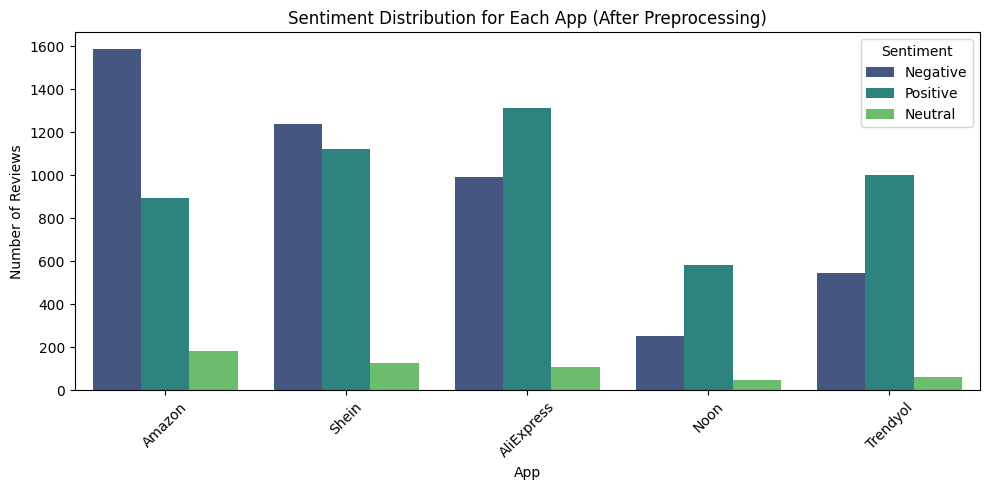

In [17]:
df_after = df.copy()

plt.figure(figsize=(10,5))

sns.countplot(
    x="app_name",
    hue="sentiment_label",
    data=df_after,
    palette="viridis"
)

plt.title("Sentiment Distribution for Each App (After Preprocessing)")
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [18]:

print("\nAfter:\n", df_after["sentiment_label"].value_counts() )


After:
 sentiment_label
Positive    4905
Negative    4619
Neutral      534
Name: count, dtype: int64


In [19]:
df.to_csv("google_play_app_reviews.csv", index=False)

In [20]:
from google.colab import files
files.download("google_play_app_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
X_text = df['tokens_str']
y = df['sentiment_label']

from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(X_train_text)   # فقط هنا fit
X_test  = vectorizer.transform(X_test_text)        # transform فقط

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [23]:
dt_model = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=5,
    class_weight="balanced",
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred))

Accuracy: 0.6769383697813122

Classification Report: 

              precision    recall  f1-score   support

    Negative       0.66      0.84      0.74       924
     Neutral       0.06      0.12      0.08       107
    Positive       0.92      0.59      0.72       981

    accuracy                           0.68      2012
   macro avg       0.55      0.52      0.51      2012
weighted avg       0.75      0.68      0.69      2012



In [24]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
    )

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.7862823061630219

Classification Report: 

              precision    recall  f1-score   support

    Negative       0.86      0.81      0.83       924
     Neutral       0.10      0.22      0.14       107
    Positive       0.89      0.82      0.86       981

    accuracy                           0.79      2012
   macro avg       0.62      0.62      0.61      2012
weighted avg       0.83      0.79      0.81      2012



In [25]:
# SUPPORT VECTOR MACHINE (SVM)

from sklearn.svm import LinearSVC
from sklearn.metrics import  confusion_matrix


svm_model = LinearSVC(class_weight='balanced', random_state=42)

#  Train Model

svm_model.fit(X_train, y_train)

#  Prediction

y_pred_SVM = svm_model.predict(X_test)

#  Evaluation
accuracy = accuracy_score(y_test, y_pred_SVM)
print("SVM Accuracy:", round(accuracy * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_SVM))
print("\nClassification Report:\n", classification_report(y_test, y_pred_SVM))


SVM Accuracy: 81.81 %

Confusion Matrix:
 [[777  56  91]
 [ 54  13  40]
 [ 89  36 856]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.84      0.84       924
     Neutral       0.12      0.12      0.12       107
    Positive       0.87      0.87      0.87       981

    accuracy                           0.82      2012
   macro avg       0.61      0.61      0.61      2012
weighted avg       0.82      0.82      0.82      2012



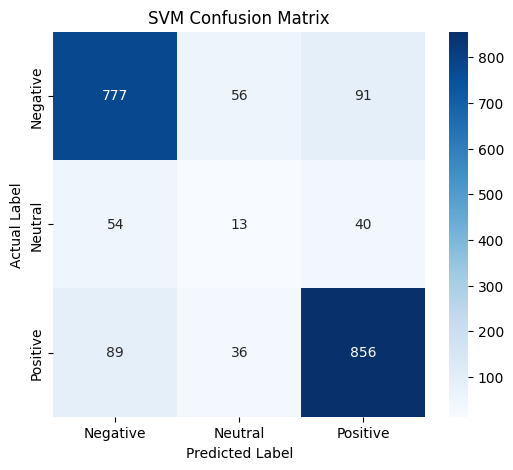

In [26]:

#  Confusion Matrix Graph FOR SVM

cm = confusion_matrix(y_test, y_pred_SVM)

plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("SVM Confusion Matrix")
plt.show()

In [27]:
print(set(y_pred_SVM))

{'Positive', 'Negative', 'Neutral'}
